Jake - Jupyter - Tutorial

In [1]:
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

In [2]:
embed_video(1)

##  Fremont Bridge Bicycle Counts

In [3]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(url, 'Fremont_data.csv')

('Fremont_data.csv', <http.client.HTTPMessage at 0x7f855470ae48>)

In [6]:
!head Fremont_data.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [7]:
!wc -l Fremont_data.csv

38641 Fremont_data.csv


In [8]:
!tail Fremont_data.csv

02/28/2017 02:00:00 PM,15,29
02/28/2017 03:00:00 PM,47,42
02/28/2017 04:00:00 PM,52,111
02/28/2017 05:00:00 PM,85,246
02/28/2017 06:00:00 PM,68,140
02/28/2017 07:00:00 PM,23,72
02/28/2017 08:00:00 PM,21,39
02/28/2017 09:00:00 PM,9,21
02/28/2017 10:00:00 PM,7,5
02/28/2017 11:00:00 PM,6,1


In [9]:
# 4 years aprox

In [10]:
import pandas as pd
data = pd.read_csv('Fremont_data.csv', index_col='Date', parse_dates=True)   # TRICK - parse date
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

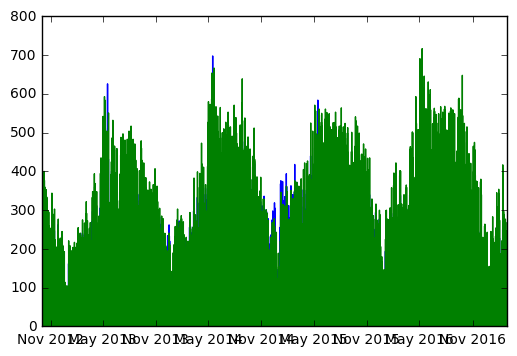

In [13]:
plt.plot(data);

In [14]:
# Object must have a datetime-like index
df_resampled = data.resample('W')         # pandas.tseries.resample.DatetimeIndexResampler
type(df_resampled), type(data)


(pandas.tseries.resample.DatetimeIndexResampler, pandas.core.frame.DataFrame)

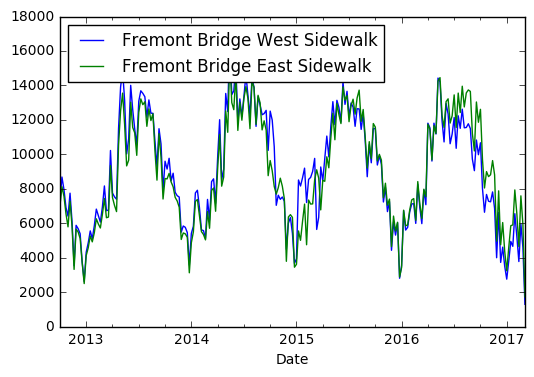

In [15]:
data.resample('W').sum().plot();

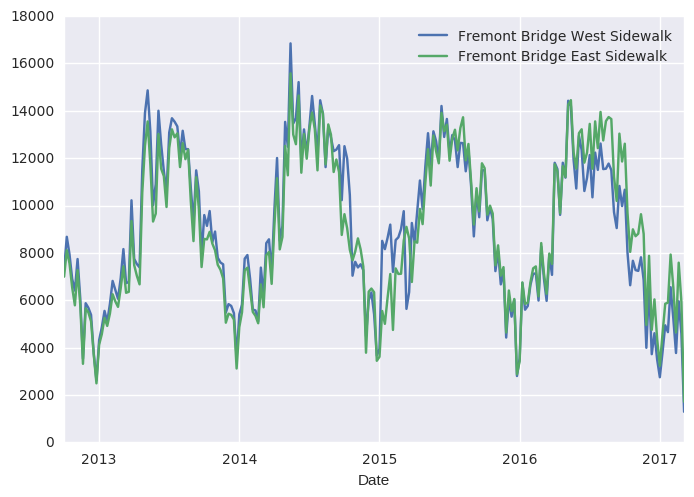

In [16]:
import seaborn as sns
data.resample('W').sum().plot();
data.columns = ['West', 'East']

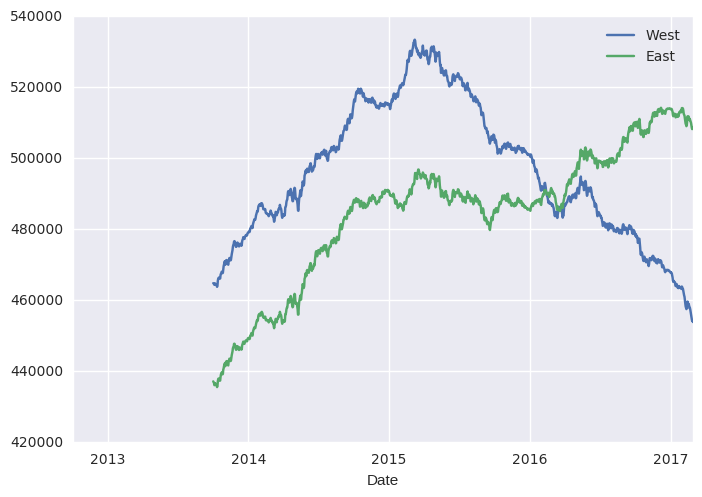

In [17]:
data.resample('D').sum().rolling(365).sum().plot();   # TRICK! resample + rolling

### Fix the scale

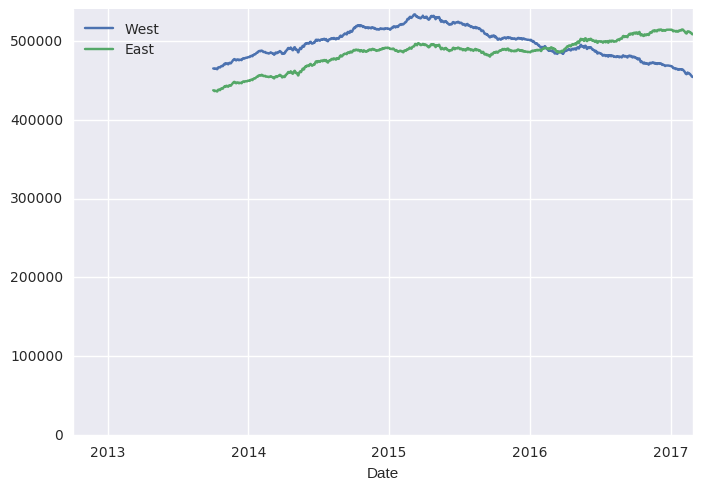

In [18]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);                                      # TRICK!- rescale graph

### Compare with the total 

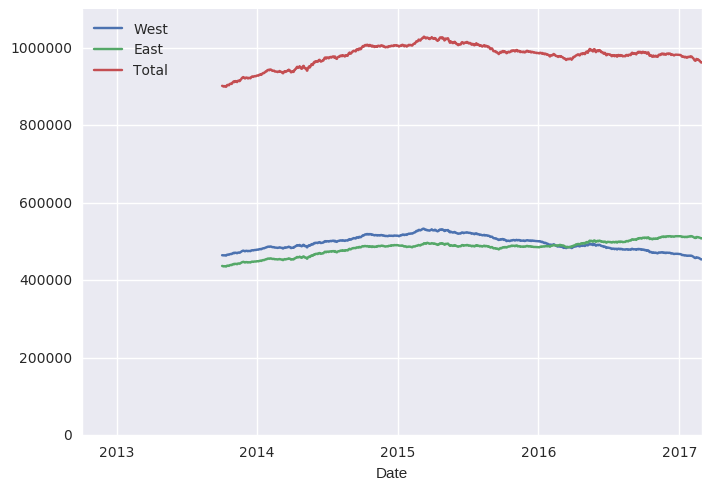

In [19]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);  

### Hourly average for all points 

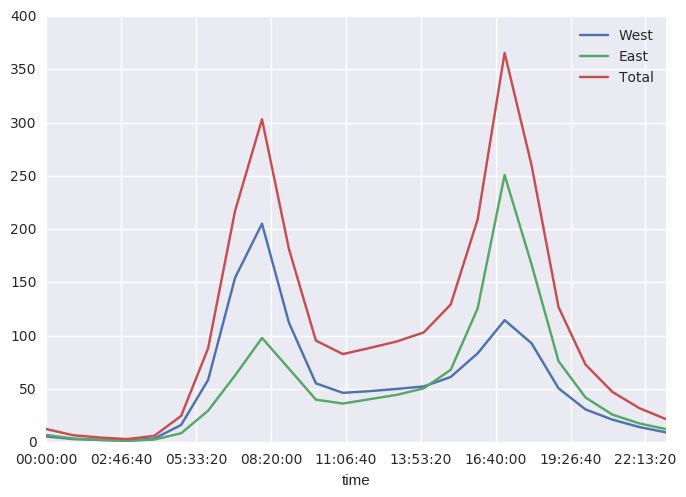

In [20]:
type(data.index)    # pandas.tseries.index.DatetimeIndex
type(data.index.date), type(data.index.time)

data.groupby(data.index.time).mean().plot()

### * westwards in the morning - eastward later - comute pattern!!!

### Check ffor each day how is hourly distributed
* check if there is a particular hourly pattern for special days
* the graph with the average hides that feature

In [21]:
# TRICK - pivoted table to show hour vs date
# for Total only
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


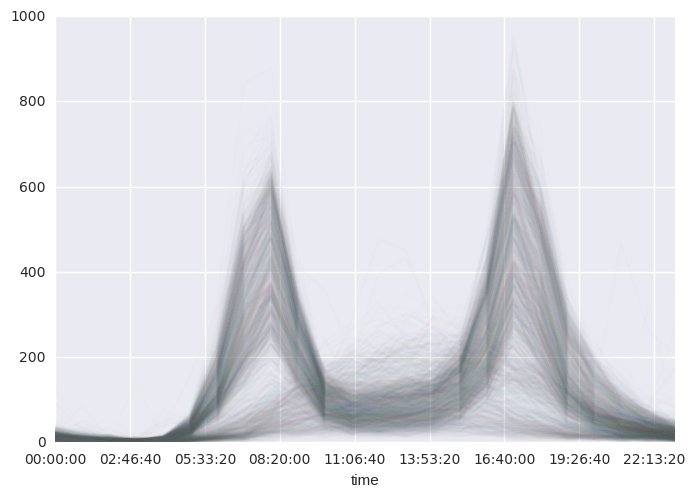

In [22]:
pivoted.plot(legend=False, alpha=0.01)


### It is visible 2 kinds of days :
* with 2 peaks -  comute pattern - week days
* one bump - weekend, holidays


# Save work in github